# Bernese parsers

Examples are shown how to use some of following Midgard Bernese parsers:

| Parser name        | Description                        |
| :------------------| :--------------------------------- |
| bernese_clu        | Bernese cluster file |
| bernese_compar_out | Bernese coordinate comparison file | 
| bernese_crd        | Bernese station coordinate file |
| bernese_prc        | Bernese protocol file |
| bernese_slr_plt    | Bernese SLR plot file |
| bernese_sta        | Bernese station information file |
| bernese_trp        | Bernese troposphere solution file |

## Use of bernese_crd parser

An example is shown, how to use the **bernese_crd** parser:

In [1]:
# Import parsers package
from midgard import parsers

# Import unit package for unit conversion
from midgard.math.unit import Unit

# Read file by generating an instance of a Parser class
p = parsers.parse_file(parser_name="bernese_crd", file_path="../../tests/parsers/example_files/bernese_crd")

# Generate dataset based on read file data
dset = p.as_dataset()

**dset** is a Midgard dataset with following data fields, which represents a column in the dataset.

| Field    | Data type  | Description |
| :------- | :--------- | :------------|
| domes    | np.ndarray | DOMES number of station  |
| flag     | np.ndarray | Bernese flag for station |
| site_pos | Position   | Position object with station coordinate information | 
| station  | np.ndarray | Station names |

In [23]:
# Show dataset fields
dset.fields
type(dset.site_pos)

midgard.data.position.TrsPosition

The **site_pos** dataset field includes the station coordinates read from the Bernese CRD file. The **site_pos** field is an **Position** object with methods for conversion from geocentric coordinates (X, Y, Z) to geodetic coordinates (latitude, longitude, height) given in **radian** (see **position.ipynb** Jupyter notebook for more information).

In [19]:
for sta, lat, lon in zip(dset.station, dset.site_pos.llh.lat, dset.site_pos.llh.lon):
    print(f"{sta.upper()}  LAT {lat*Unit.rad2deg:.4f} deg, LON {lon*Unit.rad2deg:.4f} deg")

0ABI  LAT 68.3543 deg, LON 18.8164 deg
AASC  LAT 59.6603 deg, LON 10.7817 deg
ADAC  LAT 70.4104 deg, LON 26.6954 deg


In the following is shown how to plot the station coordinates with **matplotlib** and **cartopy**:

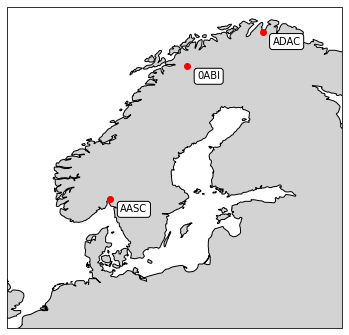

In [3]:
# Import plotting modules
# NOTE: THESE MODULES ARE NOT PART OF MIDGARD INSTALLATION. THEY
#       HAVE TO BE INSTALLED.
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

# Initialize figure object
fig = plt.figure(figsize=(6, 6))

# Define projection
projection = ccrs.Miller()
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([0, 35, 50, 71], crs=ccrs.Geodetic())

# Define mapping dataset
dataset = cfeature.NaturalEarthFeature(
    category="physical",  # Category of dataset: <cultural|physical|raster>
    name="land",  # Name of dataset: <coastline, land, ocean, ...>
    scale="50m",  # Scale: <10m|50m|110m>
    facecolor="lightgray",
)

# Add features
ax.add_feature(dataset)
ax.coastlines(resolution="50m", color="black")

# Use the cartopy interface to create a matplotlib transform object for the Geodetic
# coordinate system. We will use this along with matplotlib's offset_copy function 
# to define a coordinate system which translates the text by 15 pixels to the right 
# and 10 pixels downwards.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units="dots", x=+10, y=-10)

# Plot station location
for sta  in dset.unique("station"):
    idx = dset.filter(station=sta)
    
    # Add station markers
    ax.plot(
        dset.site_pos.llh.lon[idx] * Unit.rad2deg,
        dset.site_pos.llh.lat[idx] * Unit.rad2deg,
        marker="o",
        color="red",
        transform=ccrs.Geodetic(),
    )
    
    # Add station text
    ax.text(
        dset.site_pos.llh.lon[idx] * Unit.rad2deg,
        dset.site_pos.llh.lat[idx] * Unit.rad2deg,
        f"{sta.upper()}",
        verticalalignment="center",
        horizontalalignment="left",
        transform=text_transform,
        bbox=dict(facecolor="white", alpha=1, boxstyle="round"),
    )